In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [19]:
res_data = pd.read_csv(r'zomato.csv', encoding='latin-1')

In [20]:
res_data['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208])

#Cleaning

In [21]:
res_data = res_data.loc[(res_data['Country Code'] == 1) & (res_data['City'] == 'New Delhi'), :]
res_data = res_data.loc[res_data['Longitude'] != 0, :]
res_data = res_data.loc[res_data['Latitude'] != 0, :]
res_data = res_data.loc[res_data['Latitude'] < 29]
res_data = res_data.loc[res_data['Rating text'] != 'Not rated']
res_data['Cuisines'] = res_data['Cuisines'].astype(str)
res_data['fusion_num'] = res_data['Cuisines'].apply(lambda x: len(x.split(',')))
res_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3975 entries, 2561 to 8009
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         3975 non-null   int64  
 1   Restaurant Name       3975 non-null   object 
 2   Country Code          3975 non-null   int64  
 3   City                  3975 non-null   object 
 4   Address               3975 non-null   object 
 5   Locality              3975 non-null   object 
 6   Locality Verbose      3975 non-null   object 
 7   Longitude             3975 non-null   float64
 8   Latitude              3975 non-null   float64
 9   Cuisines              3975 non-null   object 
 10  Average Cost for two  3975 non-null   int64  
 11  Currency              3975 non-null   object 
 12  Has Table booking     3975 non-null   object 
 13  Has Online delivery   3975 non-null   object 
 14  Is delivering now     3975 non-null   object 
 15  Switch to order me

In [22]:
res_data['fusion_num'].unique()

array([1, 3, 2, 6, 4, 5, 8, 7])

In [23]:
res_data.shape

(3975, 22)

In [24]:
res_data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
fusion_num              0
dtype: int64

### What cuisines are avainable

<ipython-input-31-618ea3e42a02>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_cnt.rename(columns = {0:'cnt'}, inplace = True)


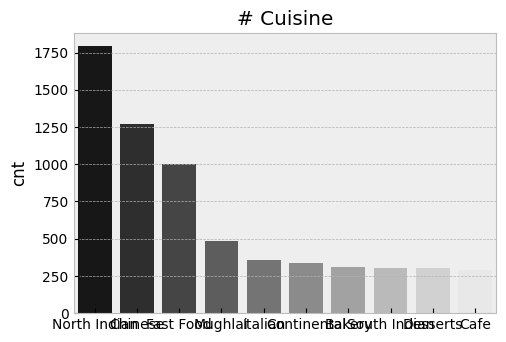

# Unique Cuisine:  78


In [31]:
lst_cuisine = set()
Cnt_cuisine = Counter()
for cu_lst in res_data['Cuisines']:
    cu_lst = cu_lst.split(',')
    lst_cuisine.update([cu.strip() for cu in cu_lst])
    for cu in cu_lst:
        Cnt_cuisine[cu.strip()] += 1

cnt = pd.DataFrame.from_dict(Cnt_cuisine, orient = 'index')
cnt.sort_values(0, ascending = False, inplace = True)


tmp_cnt = cnt.head(10)
tmp_cnt.rename(columns = {0:'cnt'}, inplace = True)
with plt.style.context('bmh'):
    f = plt.figure(figsize = (12, 8))
    ax = plt.subplot2grid((2,2), (0,0))
    sns.barplot(x = tmp_cnt.index, y = 'cnt', data = tmp_cnt, ax = ax, palette = sns.color_palette('gray', 10))
    ax.set_title('# Cuisine')
    plt.show()
print('# Unique Cuisine: ', len(lst_cuisine))

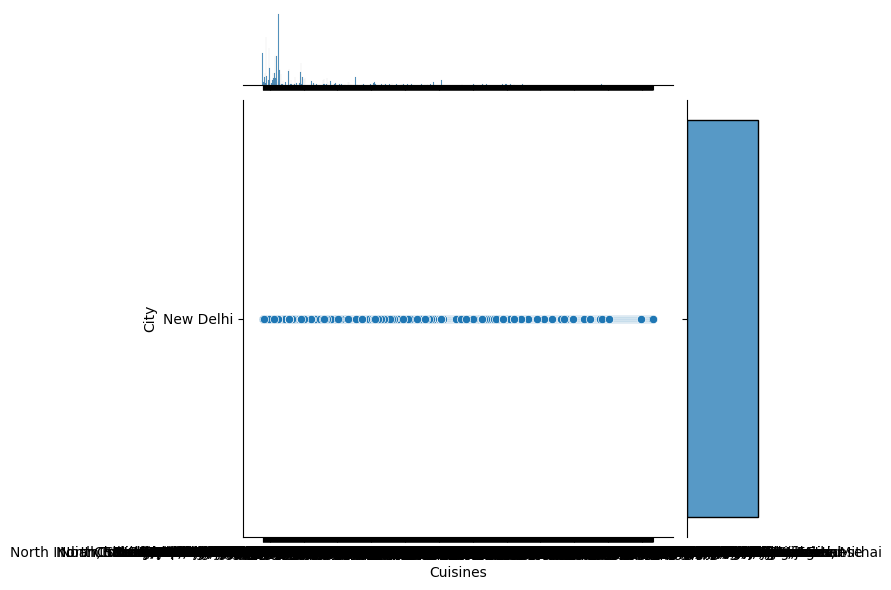

In [32]:
sns.jointplot(x="Cuisines", y="City", data=res_data)


### K-Means Clustering - Where are high-rated restaurants located

In [33]:
res_data['Rating text'].unique()

array(['Average', 'Good', 'Poor', 'Very Good', 'Excellent'], dtype=object)

In [34]:
res_data['Rating category'] = res_data['Rating text'].map({'Not rated': -1, 'Poor':0, 'Average':2, 'Good':3, 'Very Good':4, 'Excellent':5})
res_data['Rating category'] = res_data['Aggregate rating'].round(0).astype(int)

#Cluster define

In [35]:
k = res_data.iloc[:, [2,7,8,16,17]]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

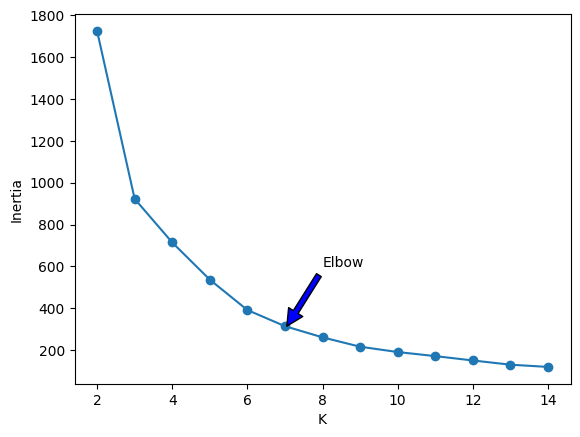

In [36]:
wcss = []
for i in range(2,15):
    km = KMeans(n_clusters= i)
    km.fit(k)
    wcss.append(km.inertia_)

plt.plot(range(2,15), wcss, marker = 'o')
plt.annotate('Elbow', xy=(7,300), xytext=(8, 600), arrowprops=dict(facecolor='blue', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Inertia");

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-37-5f5636b8946c>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pop_local = res_data.groupby('pos')['Longitude', 'Latitude', 'Aggregate rating'].agg({'Longitude':np.mean, 'Latitude':np.mean, 'Aggregate rating':np.median}).reset_index()


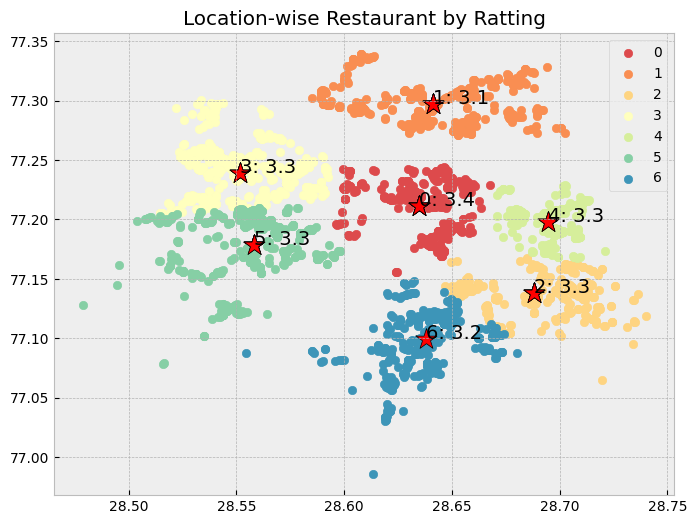

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(res_data[['Longitude', 'Latitude']])
res_data['pos'] = kmeans.labels_
pop_local = res_data.groupby('pos')['Longitude', 'Latitude', 'Aggregate rating'].agg({'Longitude':np.mean, 'Latitude':np.mean, 'Aggregate rating':np.median}).reset_index()

with plt.style.context('bmh', after_reset=True):
    pal = sns.color_palette('Spectral', 7)
    plt.figure(figsize = (8,6))
    for i in range(7):
        ix = res_data.pos == i
        plt.scatter(res_data.loc[ix, 'Latitude'], res_data.loc[ix, 'Longitude'], color = pal[i], label = str(i))
        plt.text(pop_local.loc[i, 'Latitude'], pop_local.loc[i, 'Longitude'], str(i) + ': '+str(pop_local.loc[i, 'Aggregate rating'].round(2)), fontsize = 14, color = 'black')
        plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0],s=250, marker='*',c='red', edgecolor='black')
    plt.title('Location-wise Restaurant by Ratting')


    plt.legend()
    plt.show()


In [38]:
kmeans.cluster_centers_

array([[77.21109332, 28.63477172],
       [77.29731249, 28.6411375 ],
       [77.13813123, 28.68813436],
       [77.23938251, 28.55165918],
       [77.19824523, 28.69441275],
       [77.17831369, 28.55815393],
       [77.09971162, 28.63787584]])

## Food Choices Dataset

In [39]:
food_data = pd.read_csv(r'food_choices.csv')
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          124 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [40]:
food_data[['comfort_food_reasons', 'comfort_food']]. isnull().sum()

comfort_food_reasons    1
comfort_food            1
dtype: int64

In [41]:
food_data = food_data.dropna()

In [42]:
food_data[['comfort_food_reasons', 'comfort_food']]

comfort_food_reasons  \
1                                 Stress, bored, anger   
4                           Stress, boredom, cravings    
6                                      stress, boredom   
7    I eat comfort food when im stressed out from s...   
9                           Stress, anger and sadness    
10                                            Boredom    
11                       sadness, stress, cold weather   
12                 Sadness, boredom, late night snack    
13                 stress,  boredom, special occasions   
14                    Friends, environment and boredom   
17   I usually only eat comfort food when I'm bored...   
18                                     Sadness, stress   
20                             happiness, satisfaction   
22                                sadness, depression    
23                                 Stress and boredom    
25                                             boredom   
26                                  Boredom, lazyniss    
27                                            Boredom    
31                       stres, boredom, and nighttime   
34                              boredom, stressed, sad   
35                                     Boredom usually   
37                                              Stress   
38                                     boredom, stress   
40                   Usually if I'm sad or depressed.    
44                            Stress, boredom, craving   
46                          sadness, boredom, & anger    
51                                                Lazy   
54                           stress, anger and boredom   
56   I usually only eat comfort foods when I am bor...   
57                                         Just cause    
58                            Stress, boredom, sadness   
60                           Sadness, boredom, lonely.   
62                                    boredom, sadness   
64                          Bordem, happiness, sadness   
67                                             Boredom   
68                             Stress, sadness, bored    
70                             Bad day, bored, sadness   
73                                     Boredom, stress   
75                          sadness, stressed, boredom   
76                                  boredom and stress   
77                             Boredom comfort hunger    
78                                     stress, boredom   
79                                             Boredom   
81                                    boredom, sadness   
84                        Sadness, Loneliness, Boredom   
85                                       Mostly Stress   
86                                   boredom, sadness    
87                            when i am sad or craving   
91                                  Boredom and stress   
96                    Happiness, sadness, celebration.   
103  Anxiousness, watching TV I desire "comfort food"    

                                          comfort_food  
1                          chocolate, chips, ice cream  
4                         Ice cream, chocolate, chips   
6         Chocolate, ice cream, french fries, pretzels  
7                     Ice cream, cheeseburgers, chips.  
9                Mac and cheese, chocolate, and pasta   
10   Pasta, grandma homemade chocolate cake anythin...  
11              chocolate, pasta, soup, chips, popcorn  
12                         Cookies, popcorn, and chips  
13                          ice cream, cake, chocolate  
14     Pizza, fruit, spaghetti, chicken and Potatoes    
17                           chips, cookies, ice cream  
18                                Chocolate, ice crea   
20                              Fast food, pizza, subs  
22                             burgers, chips, cookies  
23                               Chilli, soup, pot pie  
25             chocolate, ice cream/milkshake, cookies  
26              Chips, ice cream, microwaveable 